In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

#每次可以输出多个变量
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
x_data = np.linspace(-0.5, 0.5, 200)[:, np.newaxis]
noise = np.random.normal(0, 0.02, x_data.shape)
y_data = np.square(x_data) + noise

In [3]:
x = tf.placeholder(tf.float32, [np.newaxis, 1])
y = tf.placeholder(tf.float32, [np.newaxis, 1])

In [10]:
# 定义神经网络
layer_cnt = 10 # 中间层节点数量

# weight初始化为非零小值，bias初始化为0或非零小值
Weight_L1 = tf.Variable(tf.random_normal([1, layer_cnt]))
bias_L1 = tf.Variable(tf.zeros([1, layer_cnt]))
input_L1 = tf.matmul(x, Weight_L1) + bias_L1
output_L1 = tf.nn.tanh(input_L1) # 激活函数

Weight_L2 = tf.Variable(tf.random_normal([layer_cnt, 1]))
bias_L2 = tf.Variable(tf.zeros([1, 1]))
input_L2 = tf.matmul(output_L1, Weight_L2) + bias_L2
output_L2 = tf.nn.tanh(input_L2)
prediction = output_L2 # 最终结果

In [11]:
init = tf.global_variables_initializer()

loss = tf.reduce_mean(tf.square(y - prediction))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(loss)

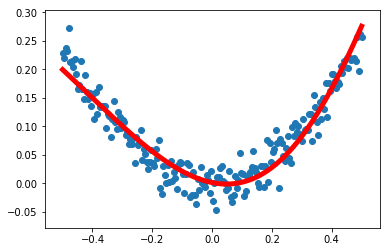

In [12]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

sess.run(init)
for i in range(2000):
    sess.run(train, feed_dict={x:x_data, y:y_data})
prediction_value = sess.run(prediction, feed_dict={x:x_data})
plt.figure()
plt.scatter(x_data, y_data)
plt.plot(x_data, prediction_value, 'r-', lw=5)
plt.show()
sess.close()